In [1]:
# Support Vector Machine (SVM)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('E:\\Semester-6\\Machine Learning\\Iris.csv')

In [4]:
dataset['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':3}, inplace=True)

In [5]:
X = dataset.iloc[:, 1:3].values
Y = dataset.iloc[:, -1].values

In [6]:
for i in X:
    print(i, end="    ")

[5.1 3.5]    [4.9 3. ]    [4.7 3.2]    [4.6 3.1]    [5.  3.6]    [5.4 3.9]    [4.6 3.4]    [5.  3.4]    [4.4 2.9]    [4.9 3.1]    [5.4 3.7]    [4.8 3.4]    [4.8 3. ]    [4.3 3. ]    [5.8 4. ]    [5.7 4.4]    [5.4 3.9]    [5.1 3.5]    [5.7 3.8]    [5.1 3.8]    [5.4 3.4]    [5.1 3.7]    [4.6 3.6]    [5.1 3.3]    [4.8 3.4]    [5. 3.]    [5.  3.4]    [5.2 3.5]    [5.2 3.4]    [4.7 3.2]    [4.8 3.1]    [5.4 3.4]    [5.2 4.1]    [5.5 4.2]    [4.9 3.1]    [5.  3.2]    [5.5 3.5]    [4.9 3.1]    [4.4 3. ]    [5.1 3.4]    [5.  3.5]    [4.5 2.3]    [4.4 3.2]    [5.  3.5]    [5.1 3.8]    [4.8 3. ]    [5.1 3.8]    [4.6 3.2]    [5.3 3.7]    [5.  3.3]    [7.  3.2]    [6.4 3.2]    [6.9 3.1]    [5.5 2.3]    [6.5 2.8]    [5.7 2.8]    [6.3 3.3]    [4.9 2.4]    [6.6 2.9]    [5.2 2.7]    [5. 2.]    [5.9 3. ]    [6.  2.2]    [6.1 2.9]    [5.6 2.9]    [6.7 3.1]    [5.6 3. ]    [5.8 2.7]    [6.2 2.2]    [5.6 2.5]    [5.9 3.2]    [6.1 2.8]    [6.3 2.5]    [6.1 2.8]    [6.4 2.9]    [6.6 3. ]    [6.8 2.8]    [6.

In [7]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [8]:
# Plot Data

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

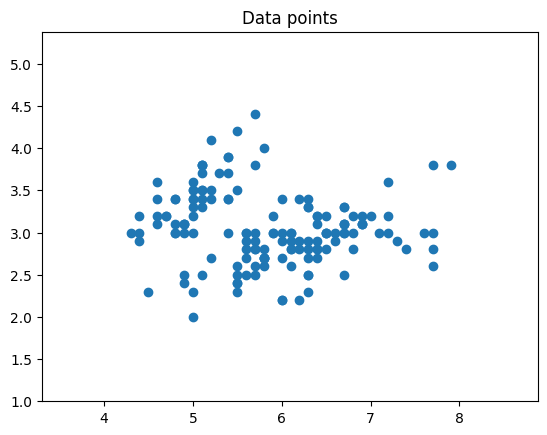

In [9]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

In [10]:
from sklearn import svm, datasets

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [12]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

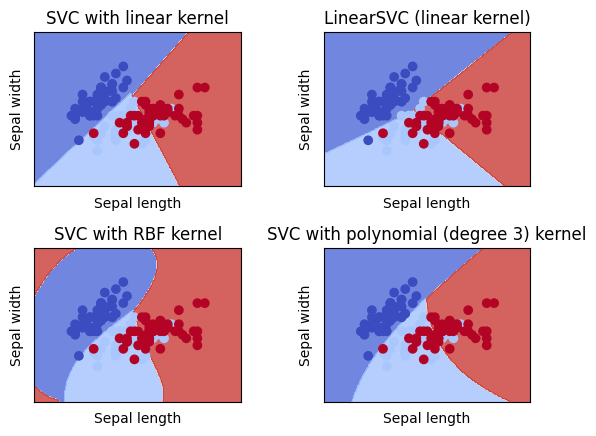

In [13]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [14]:
# Splitting the dataset into the taining and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [15]:
from sklearn import svm, datasets

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_test, y_test)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_test, y_test)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_test, y_test)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
# create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [17]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

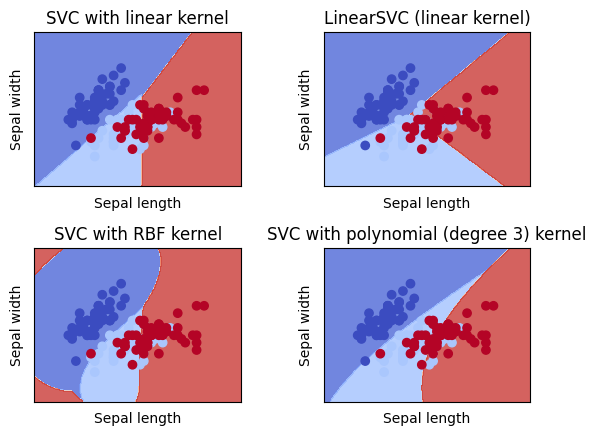

In [18]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()